In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../data/train_data.csv")
affected_df = df[df['target'] ==1 ] # separate the affected rows and not affected rows.
not_affected_df = df[df['target'] == 0 ]
df.info()

l = set() # contains all analysed columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 76 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           65535 non-null  object 
 1   ProductName                         65535 non-null  object 
 2   EngineVersion                       65535 non-null  object 
 3   AppVersion                          65535 non-null  object 
 4   SignatureVersion                    65535 non-null  object 
 5   IsBetaUser                          65535 non-null  int64  
 6   RealTimeProtectionState             65493 non-null  float64
 7   IsPassiveModeEnabled                65535 non-null  int64  
 8   AntivirusConfigID                   65490 non-null  float64
 9   NumAntivirusProductsInstalled       65490 non-null  float64
 10  NumAntivirusProductsEnabled         65490 non-null  float64
 11  HasTpm                              65535

In [8]:
def plot_and_compare (df, affected, not_affected_df , column_name):
    """ Plots 2 things 
        1. histogram to visualise the distribution
        2. box plot to visualise the IQR for different classes. 
    """
    l.add(column_name )
    sns.histplot(data=df, x=column_name, kde=True)
    #histogram plot to show distribution
    plt.show()
    x_limit = df[column_name].max() * 1.05  # Add 5% padding for better visuals

      # Boxplot to compare the distribution
    sns.boxplot(data=affected_df, x=column_name)
    plt.title('affected plot')
    plt.xlim(0, x_limit) # Ensures same scale has been followed to avoid biased conclusion.
    plt.show()

    sns.boxplot(data=not_affected_df, x=column_name)
    plt.title('Not affected plot')
    plt.xlim(0, x_limit) # Ensures same scale has been followed to avoid biased conclusion.
    plt.show()


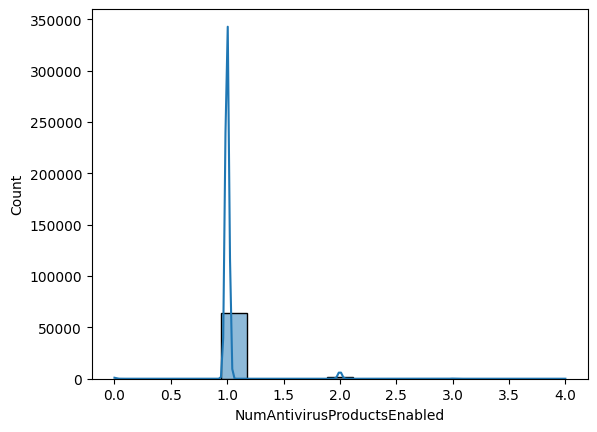

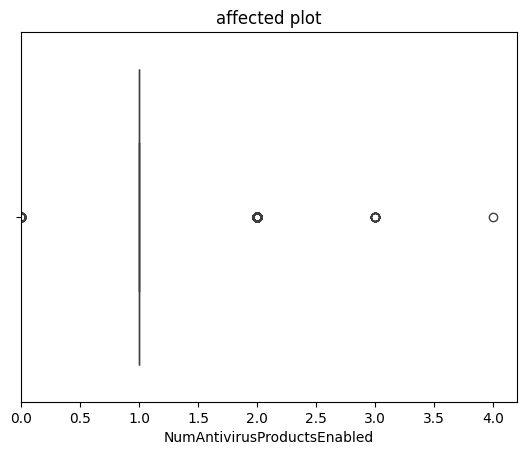

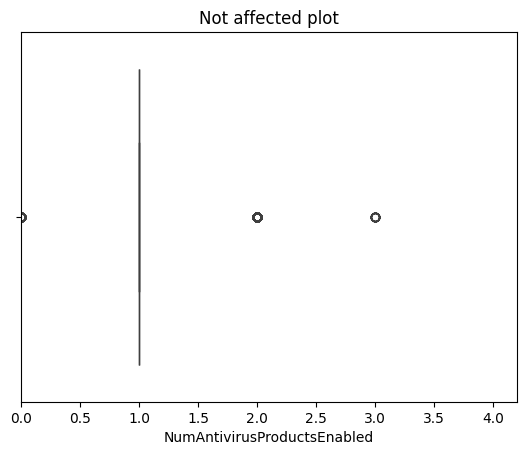

In [9]:
plot_and_compare(df,  affected_df , not_affected_df , 'NumAntivirusProductsEnabled') # not useful

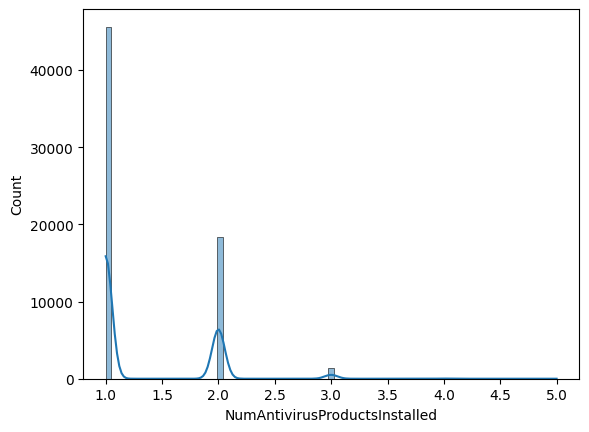

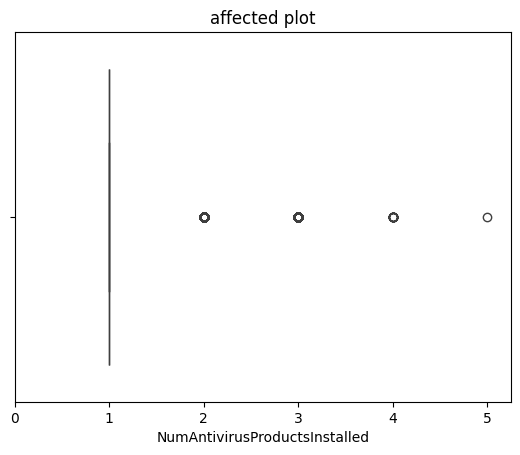

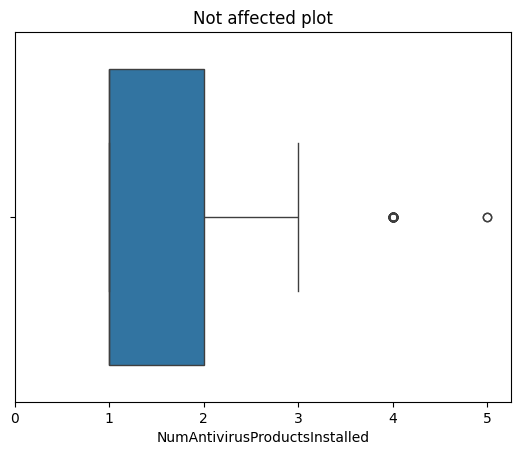

In [10]:
plot_and_compare(df,  affected_df , not_affected_df , "NumAntivirusProductsInstalled") # Useful column

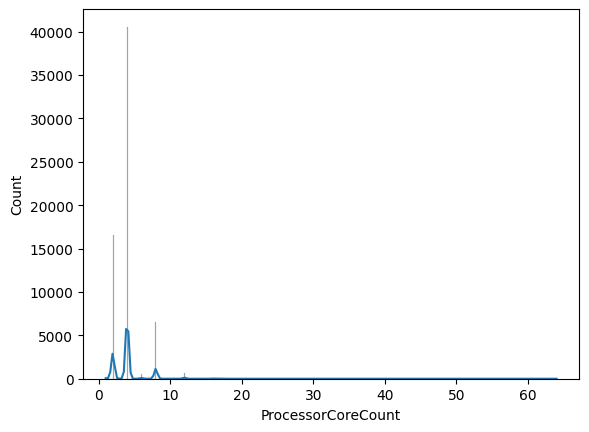

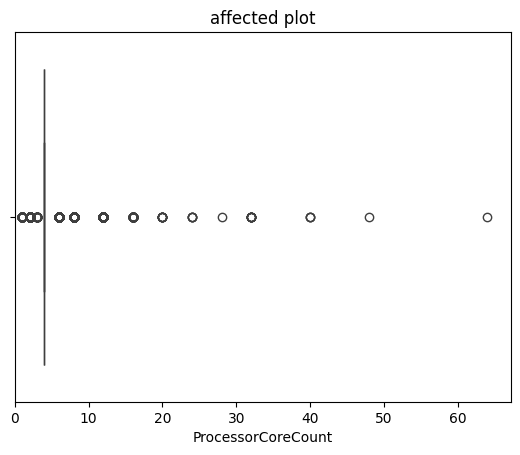

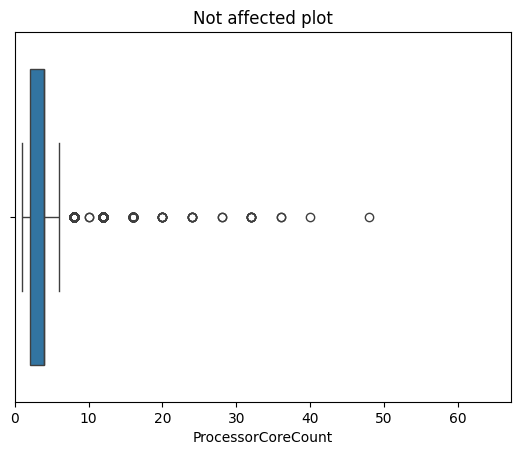

18

In [11]:
plot_and_compare(df,  affected_df , not_affected_df , 'ProcessorCoreCount') # needs more investigation interesting data
df['ProcessorCoreCount'].nunique()

324


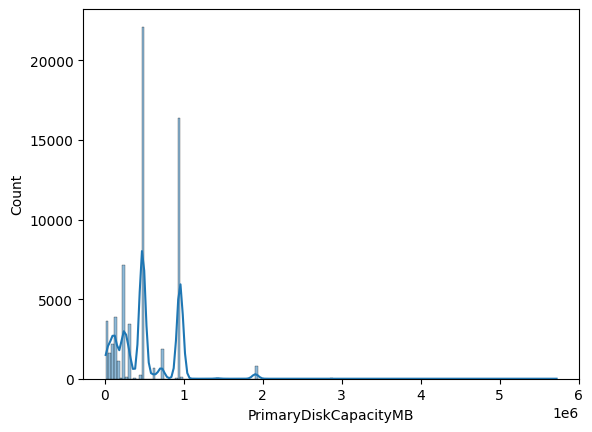

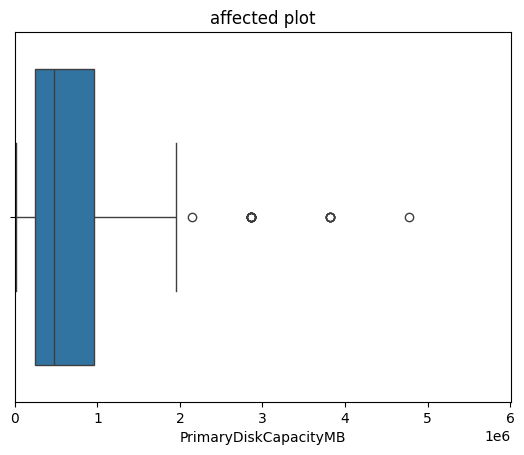

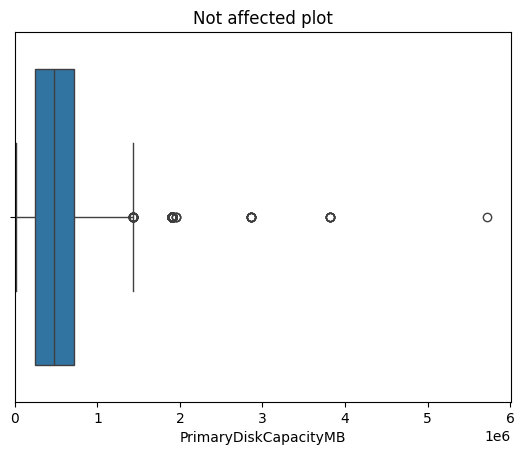

In [12]:
print(df['PrimaryDiskCapacityMB'].nunique())
plot_and_compare(df,  affected_df , not_affected_df , 'PrimaryDiskCapacityMB')# might be useful


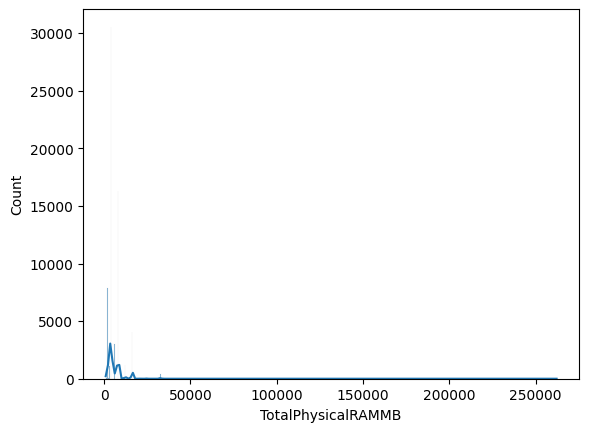

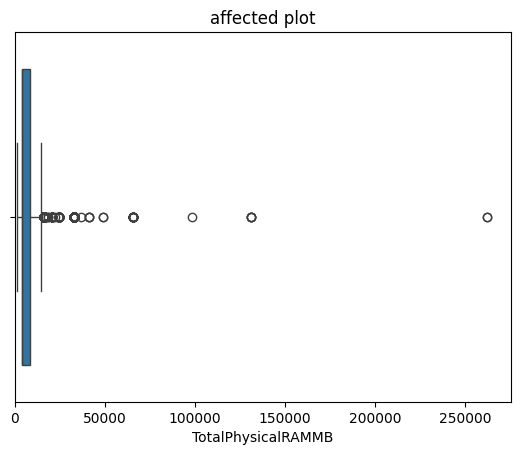

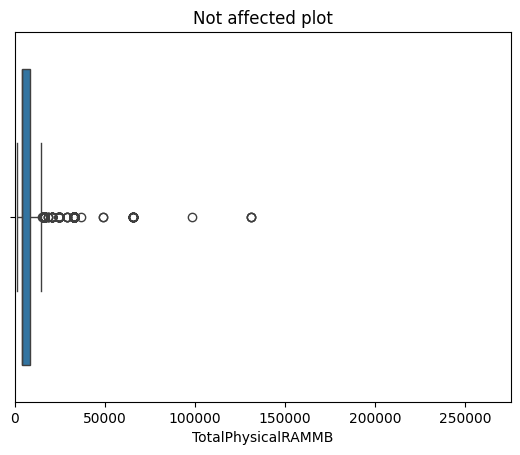

In [13]:
plot_and_compare(df,  affected_df , not_affected_df , 'TotalPhysicalRAMMB')
# non predictive because the box plots ( whisker lines , box) are litreally same

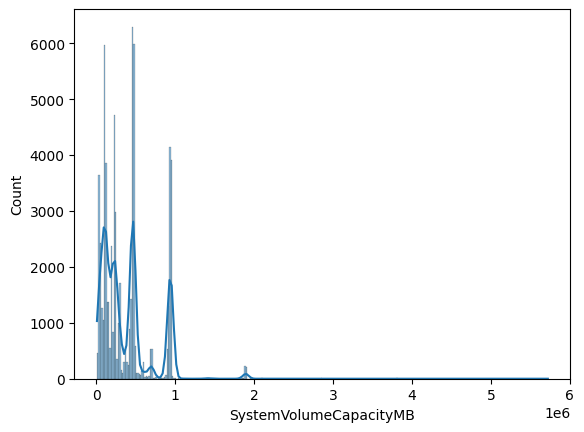

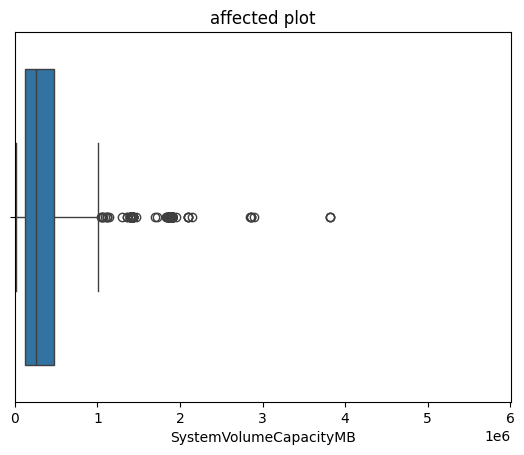

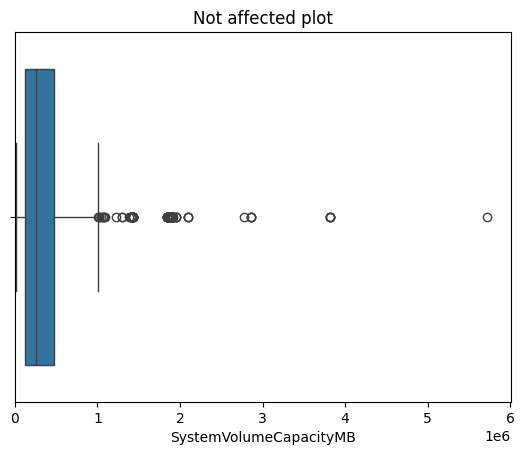

In [14]:
plot_and_compare(df,  affected_df , not_affected_df , 'SystemVolumeCapacityMB')
# non predictive because the box plots ( whisker lines , box) are litreally same

In [15]:
def count_classes (df, affected_df , unaffected_df , column ):
  """ Nothinng fancy just counts the classes to print the number of classes""" 
  count = df[column].nunique()
  print("No of "+ column , count, sep = ":")
  l.add(column )

# Just a check 
# count_classes(df,affected_df , not_affected_df, "MachineID" )
# count_classes(df,affected_df , not_affected_df, "CityID" )
# count_classes(df, affected_df, not_affected_df , "CountryID")


Exploring columns with lesser cardinality features to find patterns.
'PlatformType' : Platform Type Derived from OS and Processor Information
 'Processor' : Processor Architecture of the Installed OS
 'DeviceFamily'

In [16]:
def count_ploting(df , affected_df , not_affected_df , column ):
  crosstab = pd.crosstab(df[column], df['target'])
  print("--- Raw Counts ---")
  print(crosstab)
  crosstab_norm = pd.crosstab(df[column], df['target'], normalize='index')
  print("\n--- Proportions (percentages) ---")
  changes = crosstab_norm[1]-crosstab_norm[0]
  print(crosstab_norm)
  print("\n--- Differences  (percentages) ---")
  print(changes) 
    
  sns.countplot(df , x= column)
  plt.show()
  sns.countplot(df , x= column, hue = 'target') # categorial count plot compares based on categories.
  plt.show()
    
  
  crosstab_norm.plot(kind = 'bar', stacked = True)
  plt.show()  

  l.add(column )


No of PlatformType:4
--- Raw Counts ---
target            0      1
PlatformType              
windows10     31885  32556
windows2016      17      3
windows7         85     68
windows8        455    466

--- Proportions (percentages) ---
target               0         1
PlatformType                    
windows10     0.494794  0.505206
windows2016   0.850000  0.150000
windows7      0.555556  0.444444
windows8      0.494028  0.505972

--- Differences  (percentages) ---
PlatformType
windows10      0.010413
windows2016   -0.700000
windows7      -0.111111
windows8       0.011944
dtype: float64


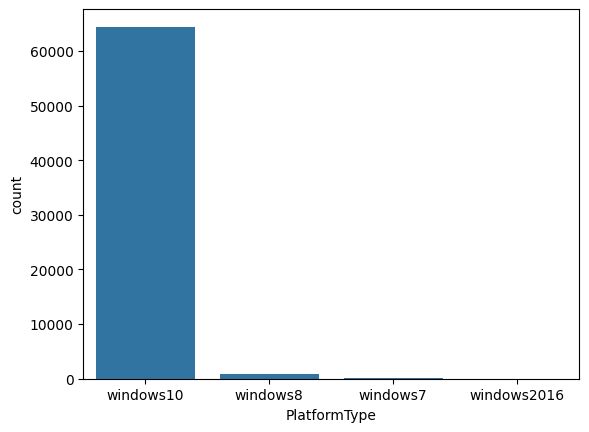

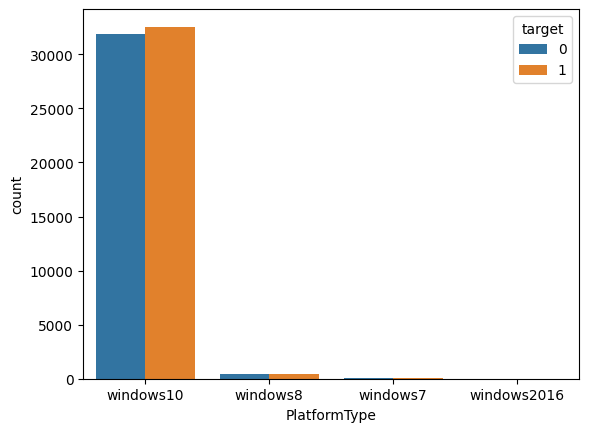

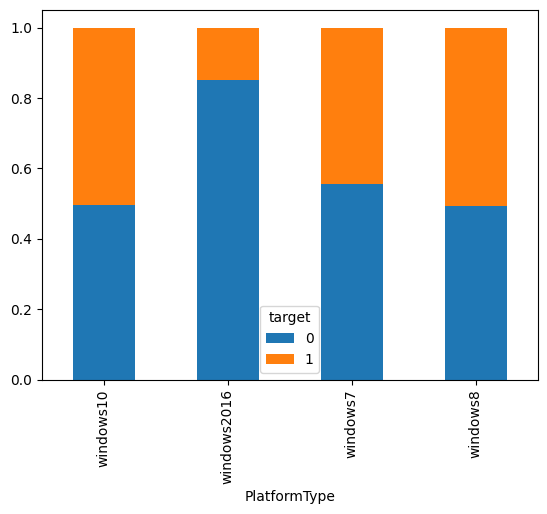

In [17]:
count_classes(df, affected_df , not_affected_df, 'PlatformType' )
count_ploting(df, affected_df , not_affected_df, 'PlatformType') # windows2016 isnt affected as much as others
# pattern should be investigates

No of RealTimeProtectionState:6
--- Raw Counts ---
target                       0      1
RealTimeProtectionState              
0.0                        922    491
1.0                          4      4
3.0                          8      5
5.0                        117     22
7.0                      31332  32454
8.0                         35     99

--- Proportions (percentages) ---
target                          0         1
RealTimeProtectionState                    
0.0                      0.652512  0.347488
1.0                      0.500000  0.500000
3.0                      0.615385  0.384615
5.0                      0.841727  0.158273
7.0                      0.491205  0.508795
8.0                      0.261194  0.738806

--- Differences  (percentages) ---
RealTimeProtectionState
0.0   -0.305025
1.0    0.000000
3.0   -0.230769
5.0   -0.683453
7.0    0.017590
8.0    0.477612
dtype: float64


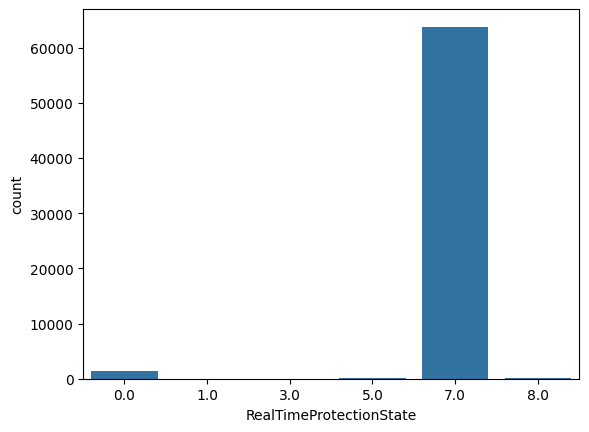

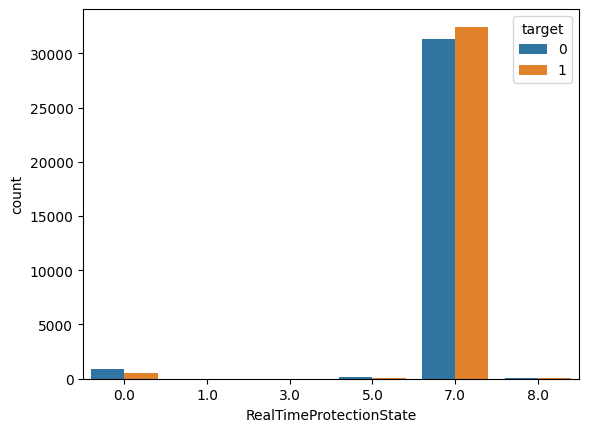

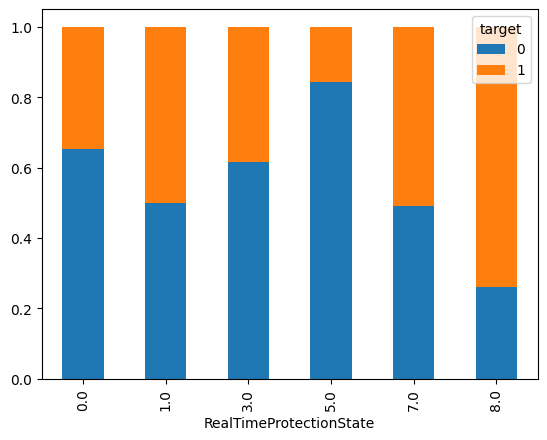

In [18]:
count_classes(df, affected_df , not_affected_df, 'RealTimeProtectionState' )
count_ploting(df, affected_df , not_affected_df, 'RealTimeProtectionState')

No of PrimaryDiskType:4
--- Raw Counts ---
target               0      1
PrimaryDiskType              
HDD              21172  22083
SSD               9145   9250
UNKNOWN           1121    933
Unspecified        998    818

--- Proportions (percentages) ---
target                  0         1
PrimaryDiskType                    
HDD              0.489469  0.510531
SSD              0.497146  0.502854
UNKNOWN          0.545764  0.454236
Unspecified      0.549559  0.450441

--- Differences  (percentages) ---
PrimaryDiskType
HDD            0.021061
SSD            0.005708
UNKNOWN       -0.091529
Unspecified   -0.099119
dtype: float64


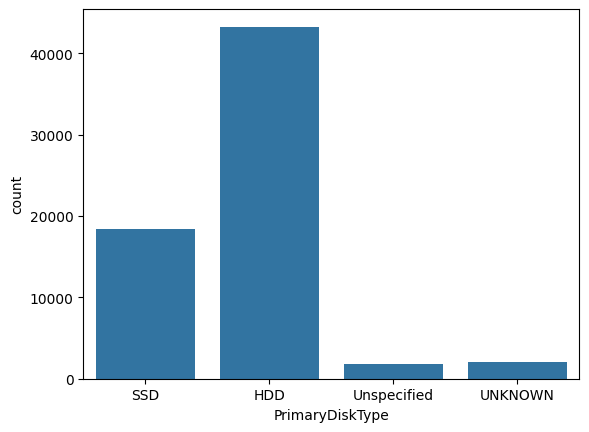

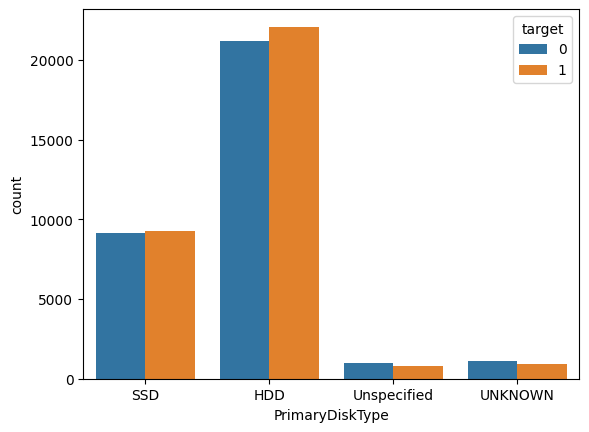

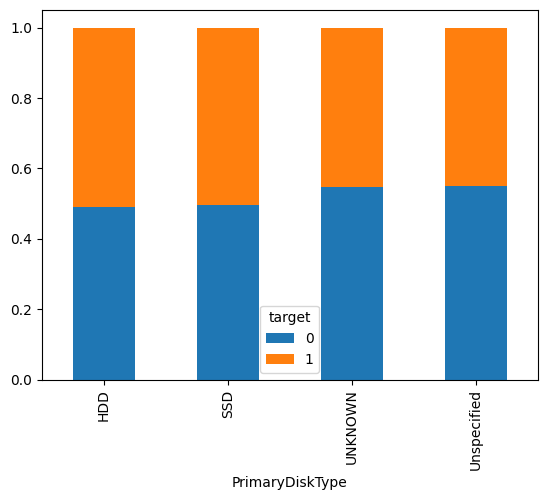

In [19]:
count_classes(df, affected_df , not_affected_df, 'PrimaryDiskType')
count_ploting(df, affected_df , not_affected_df, 'PrimaryDiskType')  # low impact

No of Processor:3
--- Raw Counts ---
target         0      1
Processor              
arm64          1      1
x64        28910  30916
x86         3531   2176

--- Proportions (percentages) ---
target            0         1
Processor                    
arm64      0.500000  0.500000
x64        0.483235  0.516765
x86        0.618714  0.381286

--- Differences  (percentages) ---
Processor
arm64    0.000000
x64      0.033531
x86     -0.237428
dtype: float64


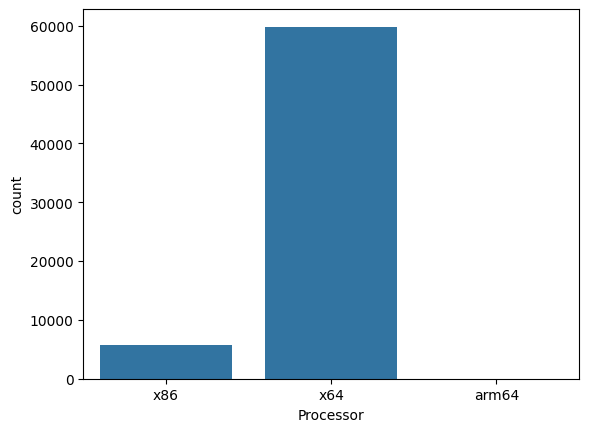

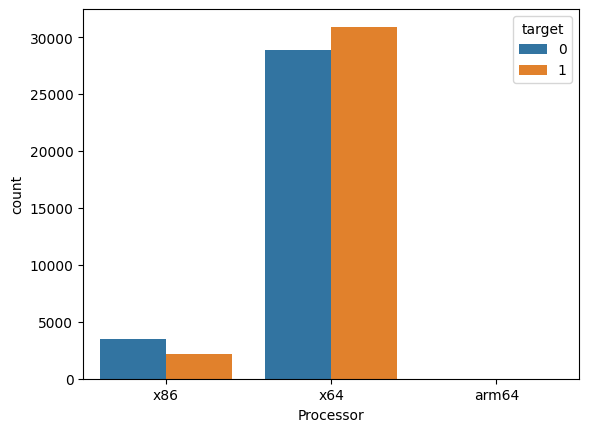

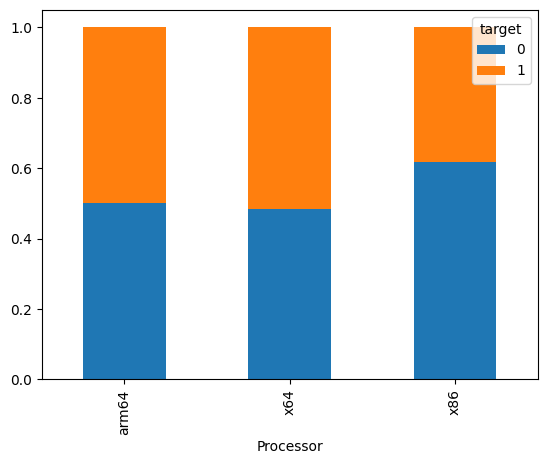

In [20]:
count_classes(df, affected_df , not_affected_df, 'Processor')
count_ploting(df, affected_df , not_affected_df, 'Processor')
# useful predictor x32 infected more than x86 processor 

Categories to keep: Index(['Home', 'Pro'], dtype='object', name='SKUEditionName')
--- Raw Counts ---
target                      0      1
SKUEditionName_grouped              
Home                    20693  20505
Other                     437    434
Pro                     11312  12154

--- Proportions (percentages) ---
target                         0         1
SKUEditionName_grouped                    
Home                    0.502282  0.497718
Other                   0.501722  0.498278
Pro                     0.482059  0.517941

--- Differences  (percentages) ---
SKUEditionName_grouped
Home    -0.004563
Other   -0.003444
Pro      0.035882
dtype: float64


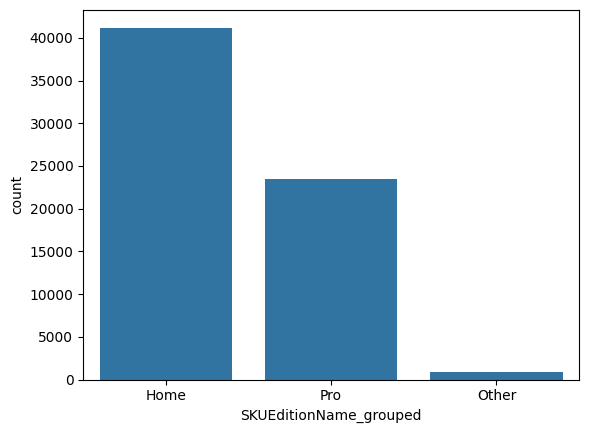

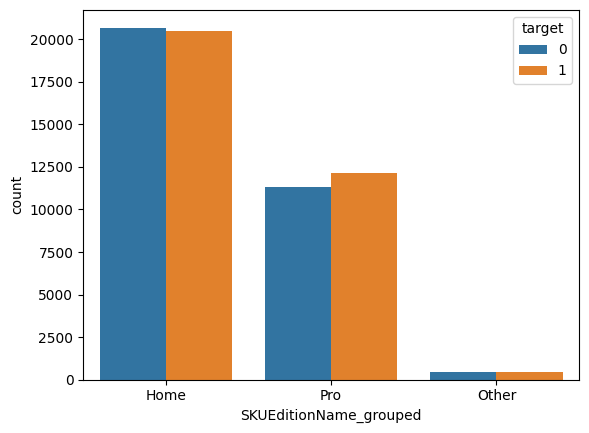

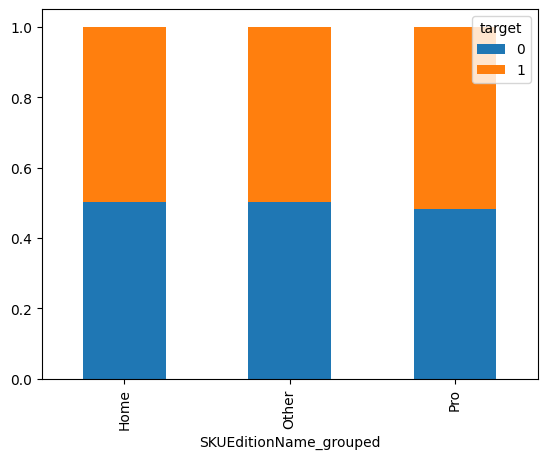

In [21]:
def group_categories_plot(df, affected_df , not_affected_df , column, no_columns):
    top_editions = df[column].value_counts().nlargest(no_columns).index
    print("Categories to keep:", top_editions)
    df[f'{column}_grouped'] = np.where(df[column].isin(top_editions), 
                                         df[column], 
                                         'Other')
    count_ploting(df, affected_df, not_affected_df, column+'_grouped' )
    l.add(column)
"""
count_classes(df, affected_df , not_affected_df, 'SKUEditionName')
count_ploting(df, affected_df , not_affected_df, 'SKUEditionName') 
"""
# count plotting lead to grouping the columns due to a high cardinality
group_categories_plot(df, affected_df, not_affected_df, 'SKUEditionName' , 2) # I see two major columns so I need to group other columns

# useful

Categories to keep: Index(['Core', 'Professional', 'CoreSingleLanguage'], dtype='object', name='OSEdition')
--- Raw Counts ---
target                  0      1
OSEdition_grouped               
Core                13435  12247
CoreSingleLanguage   6718   7757
Other                1306   1341
Professional        10983  11748

--- Proportions (percentages) ---
target                     0         1
OSEdition_grouped                     
Core                0.523129  0.476871
CoreSingleLanguage  0.464111  0.535889
Other               0.493389  0.506611
Professional        0.483173  0.516827

--- Differences  (percentages) ---
OSEdition_grouped
Core                 -0.046258
CoreSingleLanguage    0.071779
Other                 0.013223
Professional          0.033654
dtype: float64


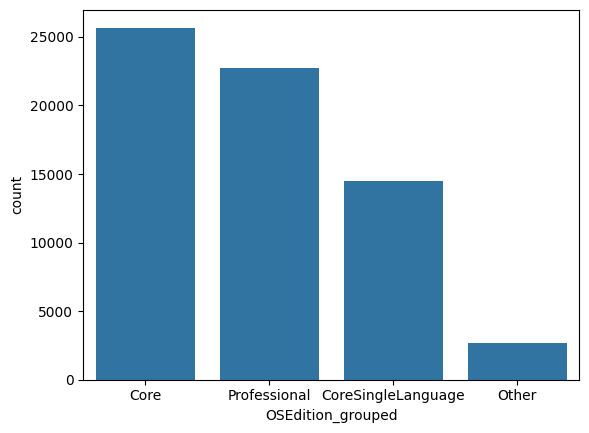

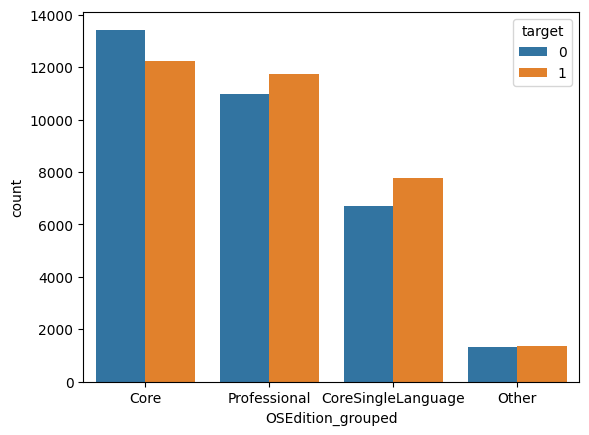

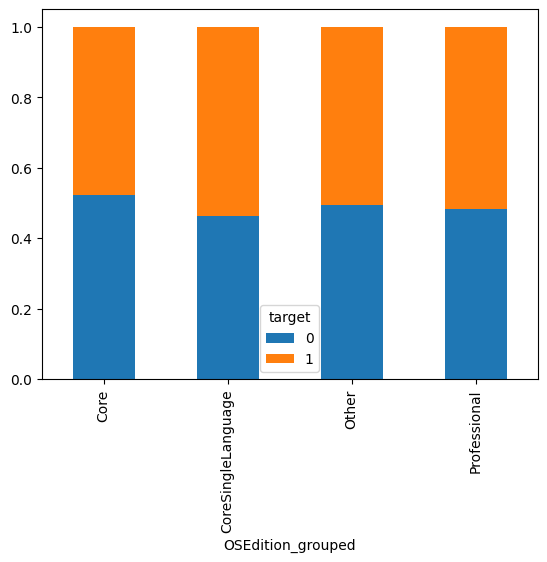

In [22]:
"""count_classes(df, affected_df , not_affected_df, 'OSEdition')
count_ploting(df, affected_df , not_affected_df, 'OSEdition')"""
group_categories_plot(df, affected_df, not_affected_df,'OSEdition' , 3) # I see 3 major columns so I need to group other columns 
#OSEdition good predictor

Categories to keep: Index([17134, 16299, 15063, 14393, 10586], dtype='int64', name='OSBuildNumber')
--- Raw Counts ---
target                     0      1
OSBuildNumber_grouped              
10586                   1407   1151
14393                   2645   2193
15063                   2794   2628
16299                   9801   9627
17134                  14180  15928
Other                   1615   1566

--- Proportions (percentages) ---
target                        0         1
OSBuildNumber_grouped                    
10586                  0.550039  0.449961
14393                  0.546714  0.453286
15063                  0.515308  0.484692
16299                  0.504478  0.495522
17134                  0.470971  0.529029
Other                  0.507702  0.492298

--- Differences  (percentages) ---
OSBuildNumber_grouped
10586   -0.100078
14393   -0.093427
15063   -0.030616
16299   -0.008956
17134    0.058058
Other   -0.015404
dtype: float64


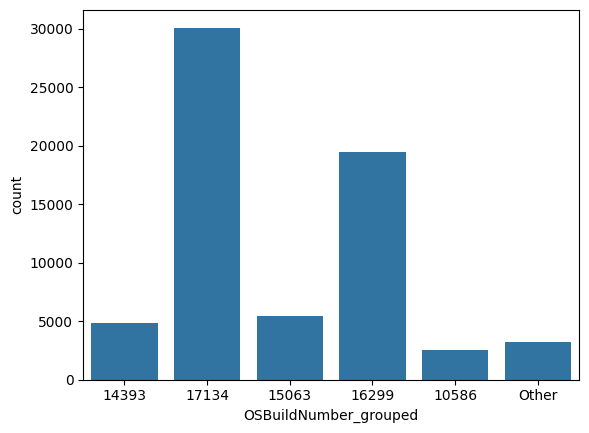

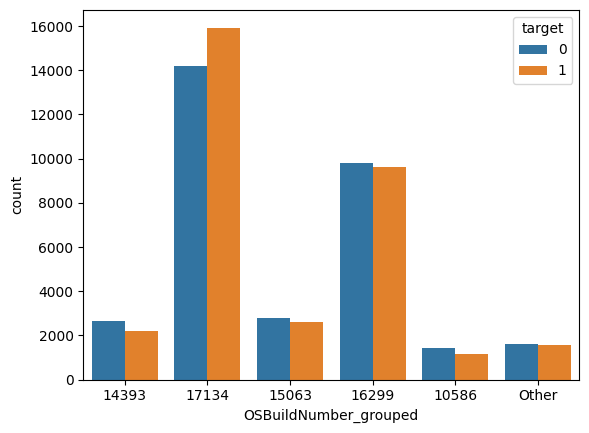

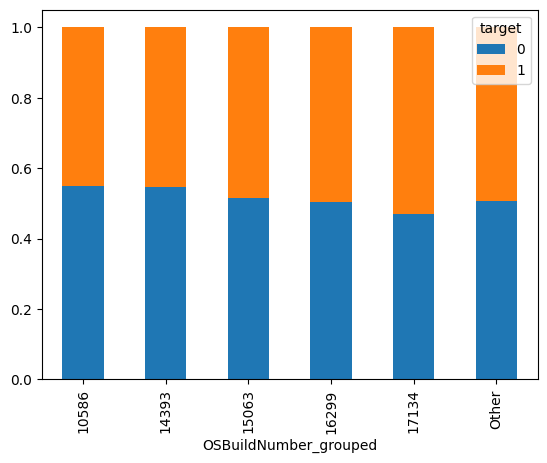

In [23]:
"""count_classes(df, affected_df , not_affected_df, 'OSBuildNumber')
count_ploting(df, affected_df , not_affected_df, 'OSBuildNumber')
"""
group_categories_plot(df, affected_df, not_affected_df, 'OSBuildNumber' , 5) # I see 5 major columns so I need to group other columns 


No of ChassisType:26
Categories to keep: Index(['Notebook', 'Desktop', 'Laptop', 'Portable'], dtype='object', name='ChassisType')
--- Raw Counts ---
target                   0      1
ChassisType_grouped              
Desktop               6541   7192
Laptop                2603   2583
Notebook             19119  19748
Other                 2831   2269
Portable              1348   1301

--- Proportions (percentages) ---
target                      0         1
ChassisType_grouped                    
Desktop              0.476298  0.523702
Laptop               0.501928  0.498072
Notebook             0.491908  0.508092
Other                0.555098  0.444902
Portable             0.508871  0.491129

--- Differences  (percentages) ---
ChassisType_grouped
Desktop     0.047404
Laptop     -0.003857
Notebook    0.016183
Other      -0.110196
Portable   -0.017743
dtype: float64


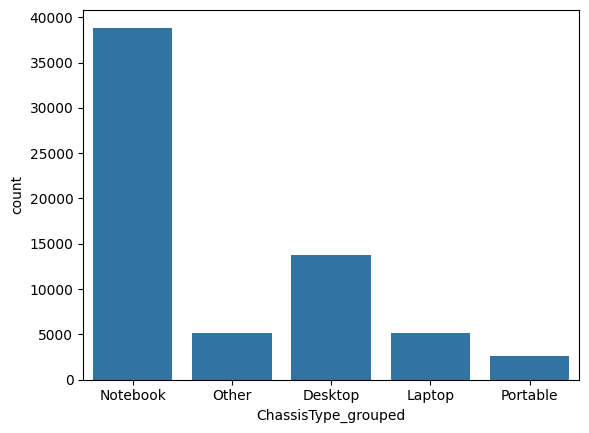

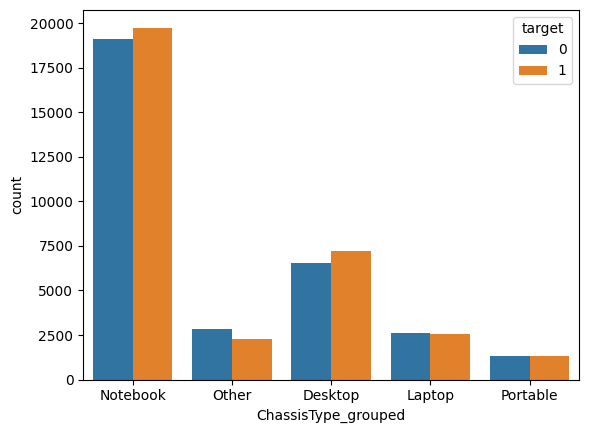

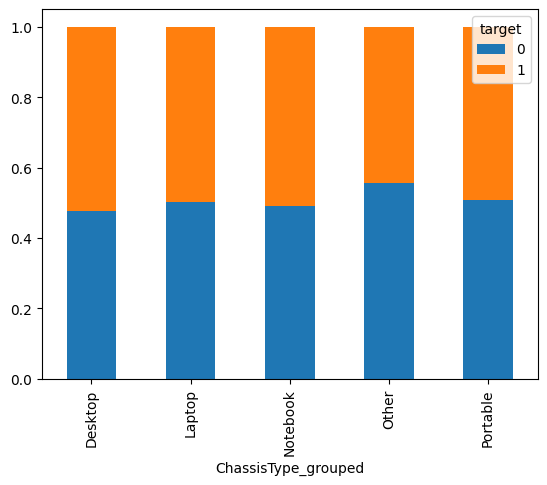

In [24]:
"""count_classes(df, affected_df , not_affected_df, 'ChassisType')
count_ploting(df, affected_df , not_affected_df, 'ChassisType') 
"""
count_classes(df, affected_df , not_affected_df, 'ChassisType')
group_categories_plot(df, affected_df, not_affected_df, 'ChassisType' , 4) # I see 3 major columns so I need to group other columns 
# less useful. 

High cardinality columns below


Categories to keep: Index([53447.0], dtype='float64', name='AntivirusConfigID')
--- Raw Counts ---
target                         0      1
AntivirusConfigID_grouped              
53447.0                    19018  24534
Other                      13424   8559

--- Proportions (percentages) ---
target                            0         1
AntivirusConfigID_grouped                    
53447.0                    0.436673  0.563327
Other                      0.610654  0.389346

--- Differences  (percentages) ---
AntivirusConfigID_grouped
53447.0    0.126653
Other     -0.221307
dtype: float64


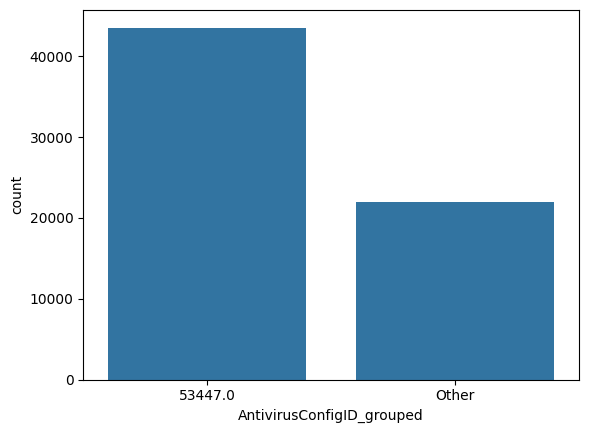

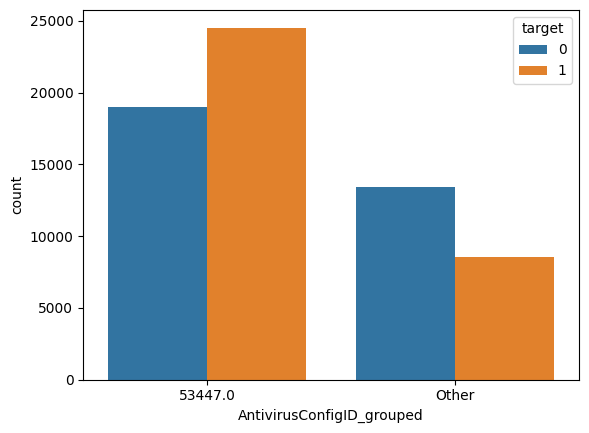

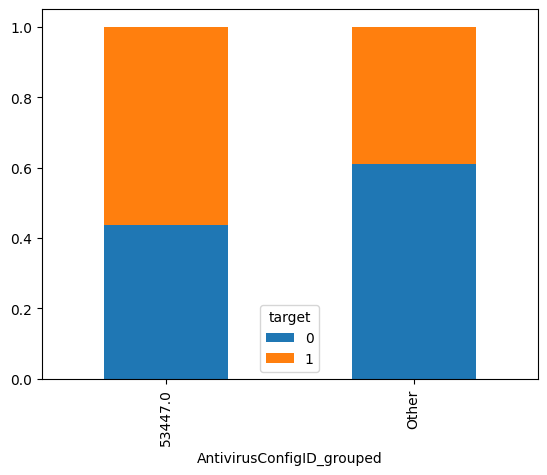

In [25]:
#count_ploting (df, affected_df, not_affected_df , "AntivirusConfigID") 
# Suspicious because intutively antivirus cofig could be a strong predictor so analysing by grouping the most occuring classes,
group_categories_plot(df, affected_df, not_affected_df, "AntivirusConfigID" , 1)




Categories to keep: Index(['4.18.1807.18075', '4.18.1806.18062', '4.12.16299.15',
       '4.16.17656.18052', '4.14.17639.18041'],
      dtype='object', name='AppVersion')
--- Raw Counts ---
target                  0      1
AppVersion_grouped              
4.12.16299.15        1150    960
4.14.17639.18041     1117    499
4.16.17656.18052     1312    642
4.18.1806.18062      3400   3431
4.18.1807.18075     18954  21831
Other                6509   5730

--- Proportions (percentages) ---
target                     0         1
AppVersion_grouped                    
4.12.16299.15       0.545024  0.454976
4.14.17639.18041    0.691213  0.308787
4.16.17656.18052    0.671443  0.328557
4.18.1806.18062     0.497731  0.502269
4.18.1807.18075     0.464730  0.535270
Other               0.531824  0.468176

--- Differences  (percentages) ---
AppVersion_grouped
4.12.16299.15      -0.090047
4.14.17639.18041   -0.382426
4.16.17656.18052   -0.342886
4.18.1806.18062     0.004538
4.18.1807.18075     0.070541

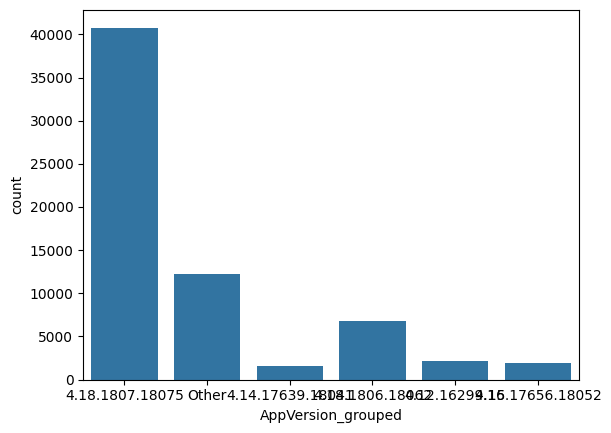

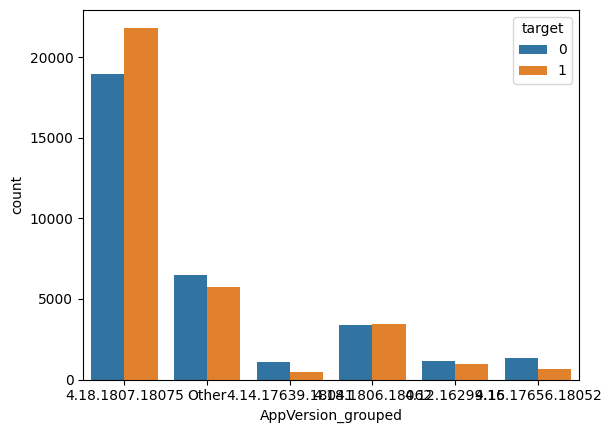

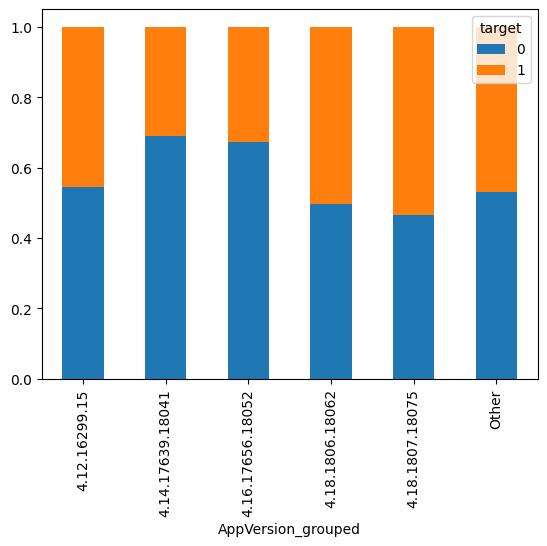

In [26]:
group_categories_plot(df, affected_df, not_affected_df, "AppVersion" , 5)

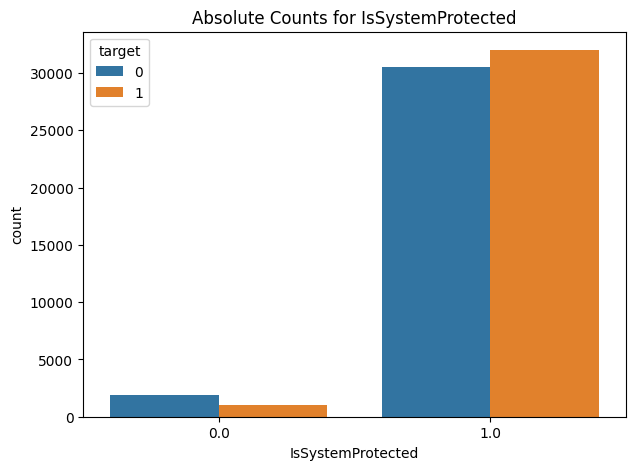

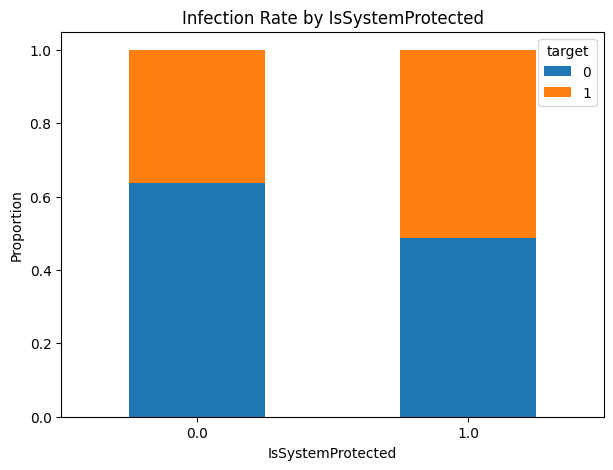

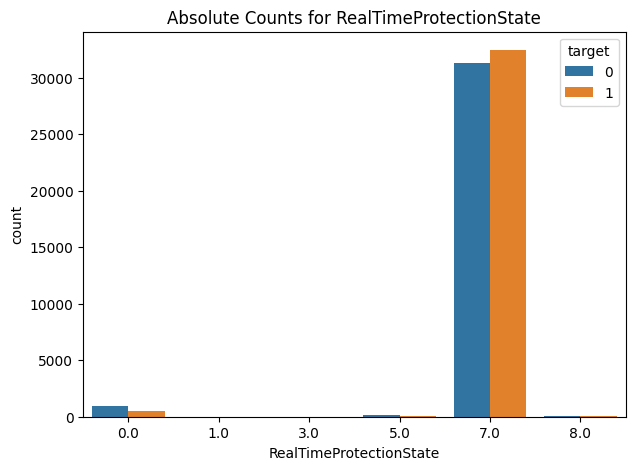

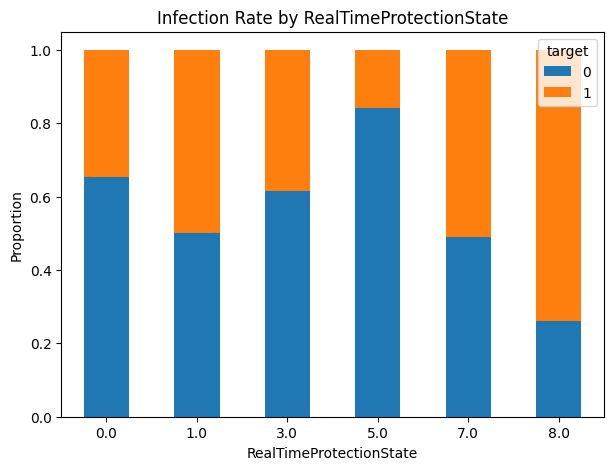

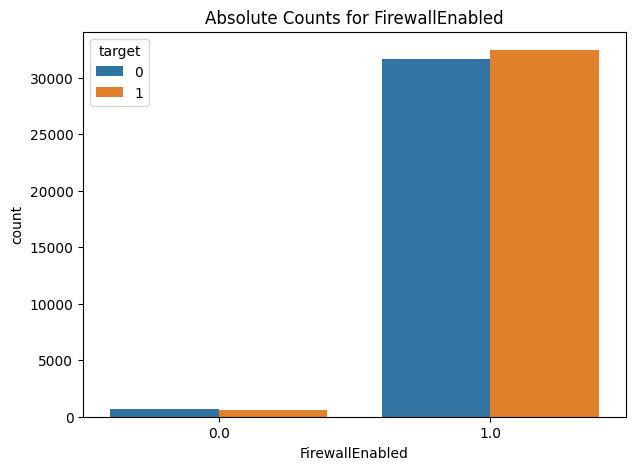

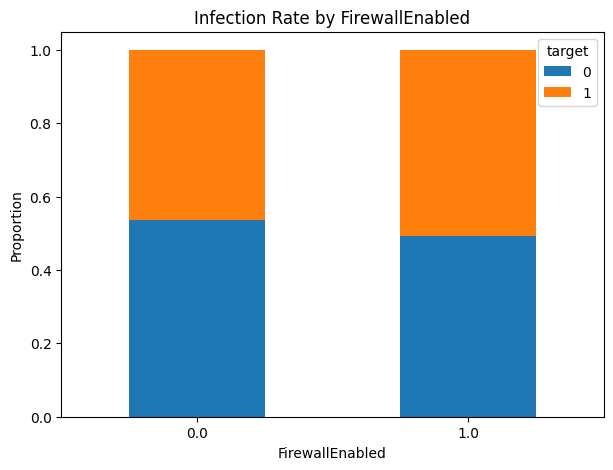

In [27]:
binary_columns = [
    #'IsBetaUser',
    #'IsPassiveModeEnabled',
    #'HasTpm',
    'IsSystemProtected',
    'RealTimeProtectionState',
    'FirewallEnabled'
    #'IsSecureBootEnabled',
    #'HasOpticalDiskDrive',
    
    
]

# 2. Loop through each column and create a normalized plot
for column in binary_columns:
    # Create the normalized crosstab to get the rates
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=column, hue='target')
    plt.title(f'Absolute Counts for {column}')
    plt.show()
    
    crosstab_norm = pd.crosstab(df[column], df['target'], normalize='index')
    
    # Plot the rates as a stacked bar chart
    crosstab_norm.plot(kind='bar', 
                       stacked=True, 
                       figsize=(7, 5),
                       title=f'Infection Rate by {column}')
    l.add(column)

    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.show()

No of LocaleEnglishNameID:179


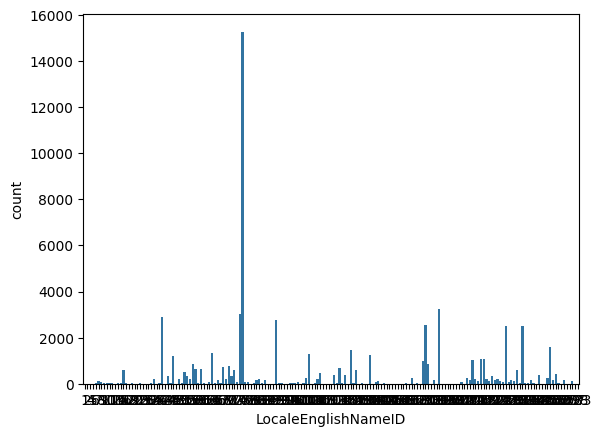

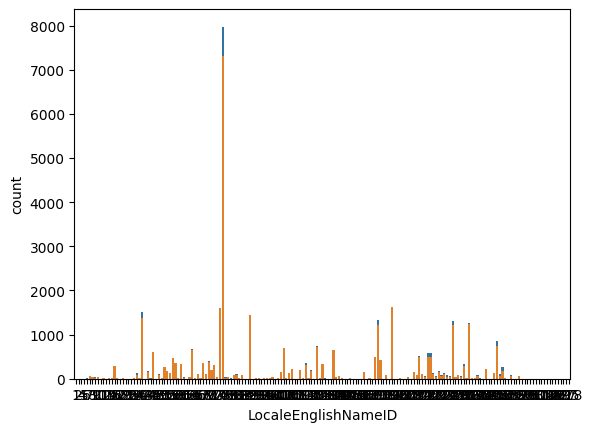

In [28]:
count_classes(df, affected_df, not_affected_df, 'LocaleEnglishNameID')
sns.countplot(df, x="LocaleEnglishNameID")
plt.show()
sns.countplot(affected_df , x = "LocaleEnglishNameID")
sns.countplot(not_affected_df , x = "LocaleEnglishNameID")

plt.show()

# drop Locale English Name Id

Categories to keep: Index([137.0, 117.0, 108.0, 111.0, 98.0], dtype='float64', name='IEVersionID')
--- Raw Counts ---
target                   0      1
IEVersionID_grouped              
108.0                 1819   1705
111.0                 1661   1648
117.0                 7038   7084
137.0                14162  15907
98.0                  1358   1205
Other                 6404   5544

--- Proportions (percentages) ---
target                      0         1
IEVersionID_grouped                    
108.0                0.516175  0.483825
111.0                0.501964  0.498036
117.0                0.498371  0.501629
137.0                0.470983  0.529017
98.0                 0.529848  0.470152
Other                0.535989  0.464011

--- Differences  (percentages) ---
IEVersionID_grouped
108.0   -0.032350
111.0   -0.003929
117.0    0.003257
137.0    0.058033
98.0    -0.059696
Other   -0.071979
dtype: float64


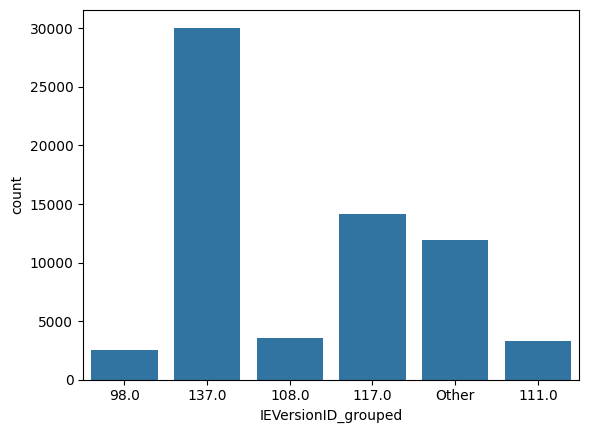

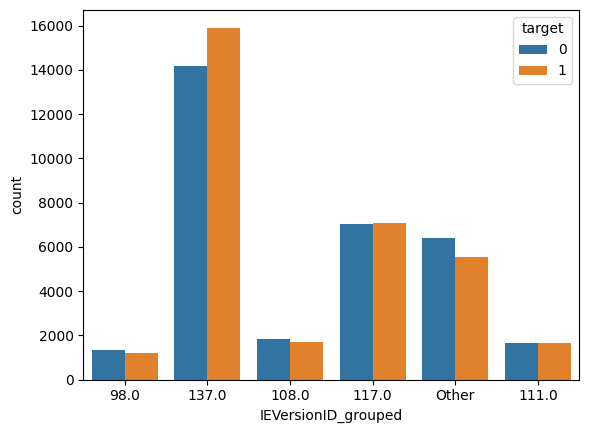

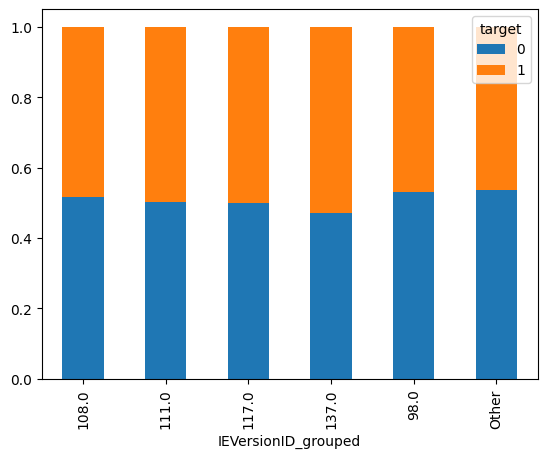

In [29]:
# count_classes(df, affected_df, not_affected_df, 'IEVersionID')
# sns.countplot(df, x='IEVersionID')
# plt.show()
# sns.countplot(affected_df , x = 'IEVersionID')
# sns.countplot(not_affected_df , x ='IEVersionID')
group_categories_plot(df, affected_df, not_affected_df, 'IEVersionID' ,5) 
plt.show()
# drop

--- Raw Counts ---
target                 0      1
IsSystemProtected              
0.0                 1877   1067
1.0                30533  32013

--- Proportions (percentages) ---
target                    0         1
IsSystemProtected                    
0.0                0.637568  0.362432
1.0                0.488169  0.511831

--- Differences  (percentages) ---
IsSystemProtected
0.0   -0.275136
1.0    0.023663
dtype: float64


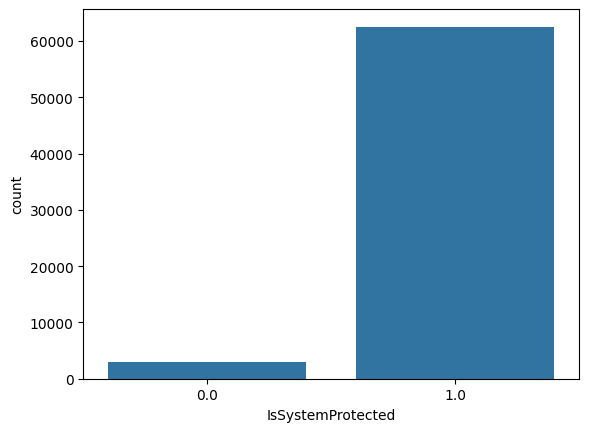

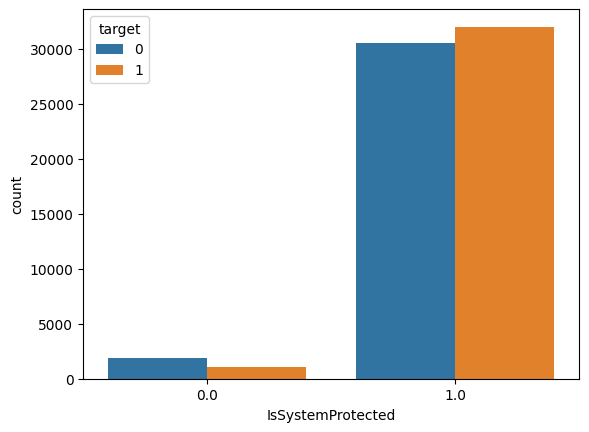

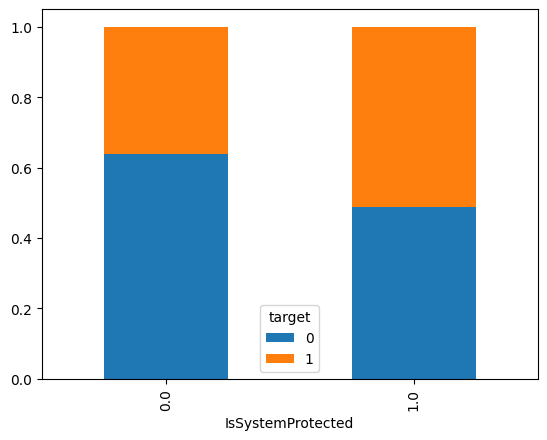

In [30]:
count_ploting(df, affected_df, not_affected_df, 'IsSystemProtected' ) 

No of OSArchitecture:3
--- Raw Counts ---
target              0      1
OSArchitecture              
amd64           28921  30917
arm64               1      1
x86              3520   2175

--- Proportions (percentages) ---
target                 0         1
OSArchitecture                    
amd64           0.483322  0.516678
arm64           0.500000  0.500000
x86             0.618086  0.381914

--- Differences  (percentages) ---
OSArchitecture
amd64    0.033357
arm64    0.000000
x86     -0.236172
dtype: float64


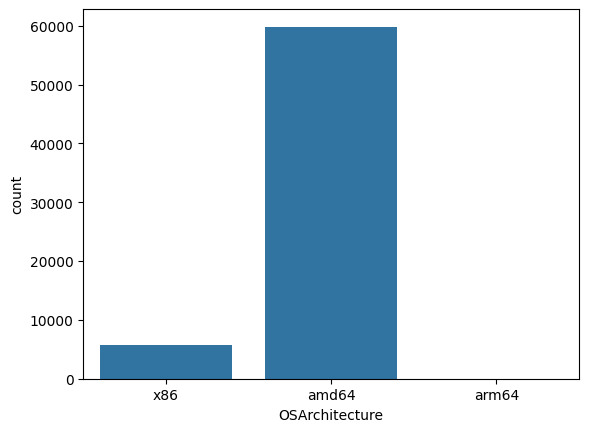

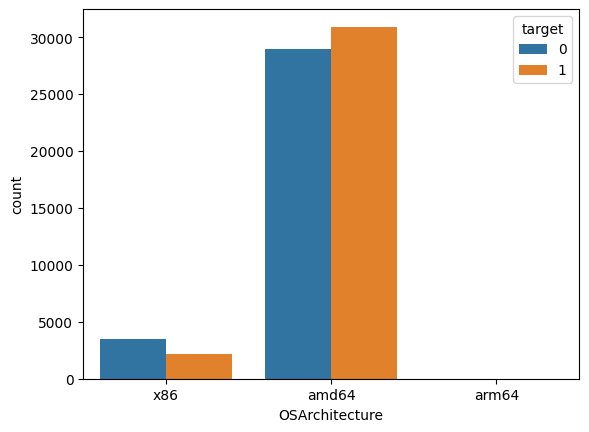

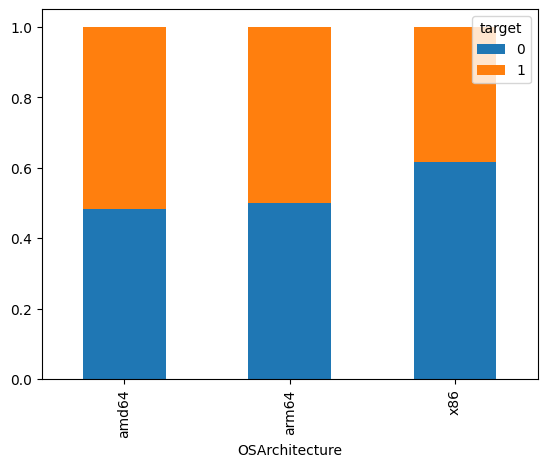

In [31]:
count_classes(df, affected_df,not_affected_df, 'OSArchitecture' )
count_ploting(df,affected_df, not_affected_df, 'OSArchitecture') # Redundant to processor

--- Raw Counts ---
target               0      1
DeviceFamily                 
Windows.Desktop  32425  33090
Windows.Server      17      3

--- Proportions (percentages) ---
target                  0         1
DeviceFamily                       
Windows.Desktop  0.494925  0.505075
Windows.Server   0.850000  0.150000

--- Differences  (percentages) ---
DeviceFamily
Windows.Desktop    0.01015
Windows.Server    -0.70000
dtype: float64


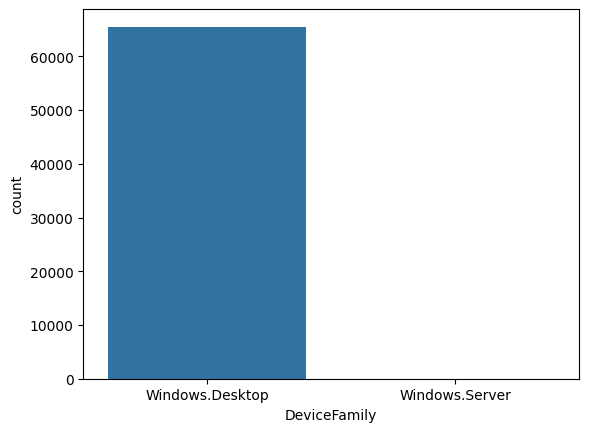

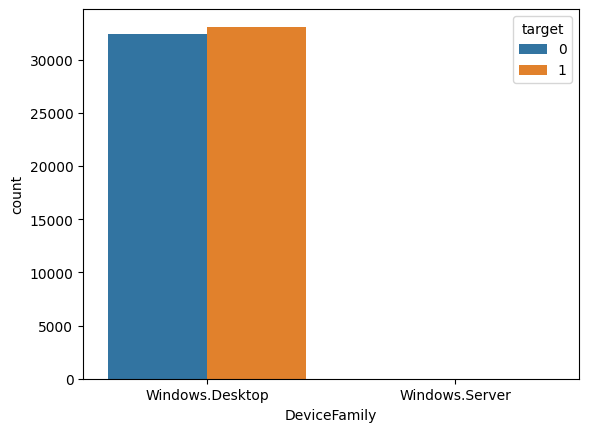

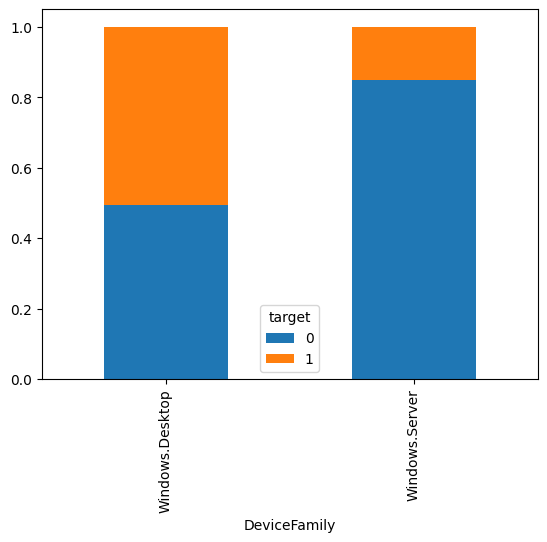

In [32]:
count_ploting(df, affected_df, not_affected_df, 'DeviceFamily') #drop

Categories to keep: Index([4.0, 2.0, 8.0, 12.0, 6.0], dtype='float64', name='ProcessorCoreCount')
--- Raw Counts ---
target                          0      1
ProcessorCoreCount_grouped              
12.0                          270    415
2.0                          8917   7696
4.0                         19828  20731
6.0                           222    299
8.0                          2821   3668
Other                         384    284

--- Proportions (percentages) ---
target                             0         1
ProcessorCoreCount_grouped                    
12.0                        0.394161  0.605839
2.0                         0.536748  0.463252
4.0                         0.488868  0.511132
6.0                         0.426104  0.573896
8.0                         0.434736  0.565264
Other                       0.574850  0.425150

--- Differences  (percentages) ---
ProcessorCoreCount_grouped
12.0     0.211679
2.0     -0.073497
4.0      0.022264
6.0      0.147793
8.0      

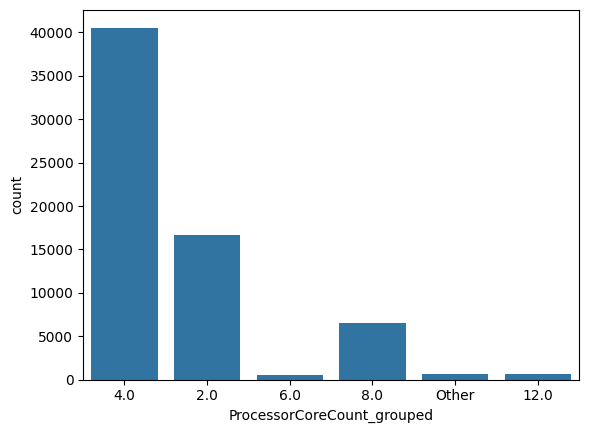

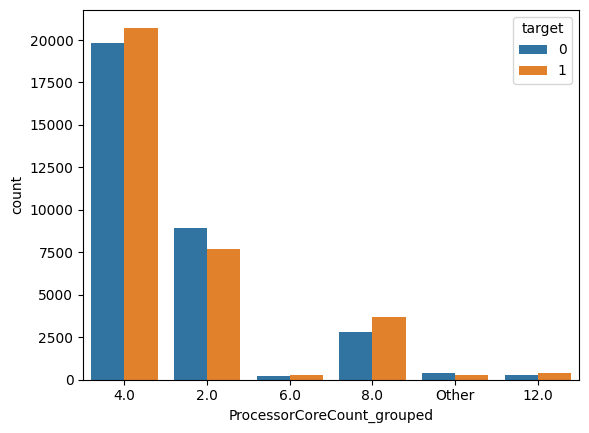

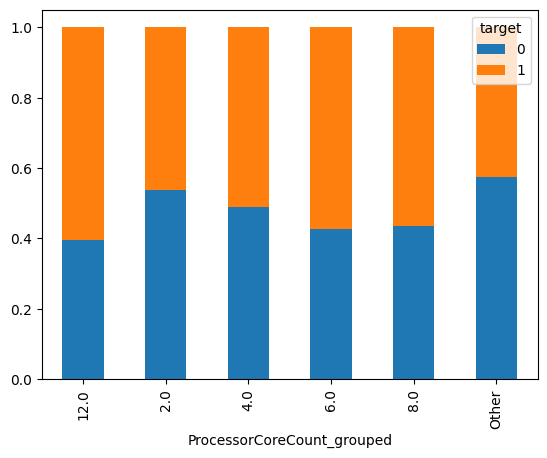

In [33]:
#count_ploting(df, affected_df, not_affected_df, 'ProcessorCoreCount')
group_categories_plot(df, affected_df, not_affected_df, "ProcessorCoreCount" , 5)

No of PowerPlatformRole:9
--- Raw Counts ---
target                 0      1
PowerPlatformRole              
AppliancePC           18      7
Desktop             7215   7941
EnterpriseServer      16      8
Mobile             22392  23279
PerformanceServer      0      1
SOHOServer           134    127
Slate               2327   1362
UNKNOWN               32     31
Workstation          308    337

--- Proportions (percentages) ---
target                    0         1
PowerPlatformRole                    
AppliancePC        0.720000  0.280000
Desktop            0.476049  0.523951
EnterpriseServer   0.666667  0.333333
Mobile             0.490289  0.509711
PerformanceServer  0.000000  1.000000
SOHOServer         0.513410  0.486590
Slate              0.630794  0.369206
UNKNOWN            0.507937  0.492063
Workstation        0.477519  0.522481

--- Differences  (percentages) ---
PowerPlatformRole
AppliancePC         -0.440000
Desktop              0.047902
EnterpriseServer    -0.333333
Mobile

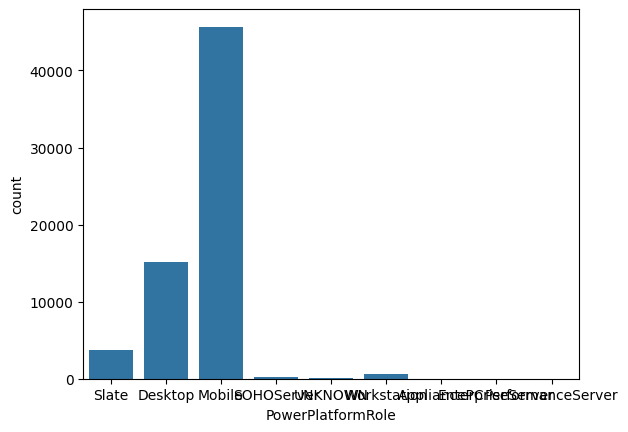

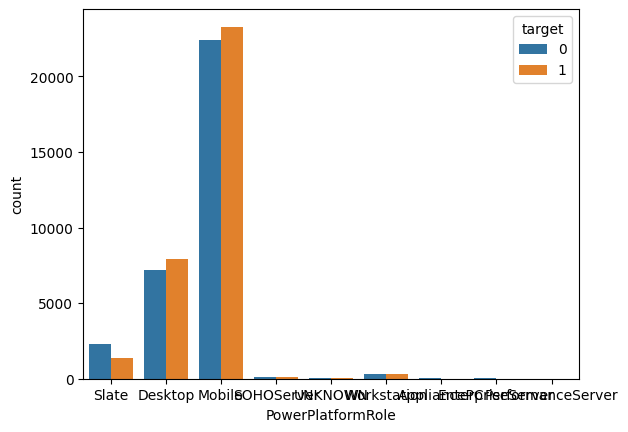

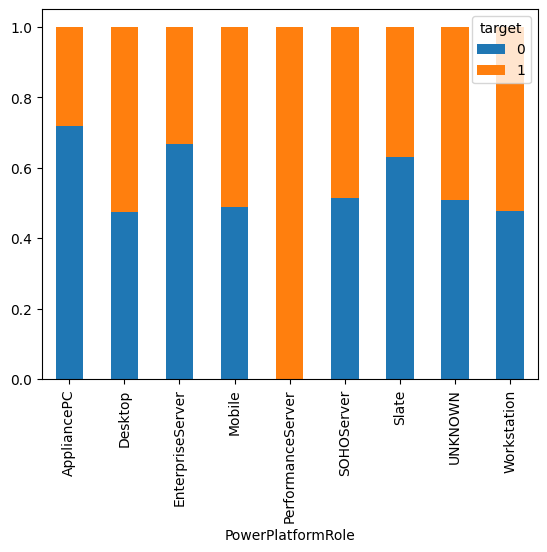

Categories to keep: Index(['Mobile', 'Desktop', 'Slate'], dtype='object', name='PowerPlatformRole')
--- Raw Counts ---
target                         0      1
PowerPlatformRole_grouped              
Desktop                     7215   7941
Mobile                     22392  23279
Other                        508    511
Slate                       2327   1362

--- Proportions (percentages) ---
target                            0         1
PowerPlatformRole_grouped                    
Desktop                    0.476049  0.523951
Mobile                     0.490289  0.509711
Other                      0.498528  0.501472
Slate                      0.630794  0.369206

--- Differences  (percentages) ---
PowerPlatformRole_grouped
Desktop    0.047902
Mobile     0.019422
Other      0.002944
Slate     -0.261589
dtype: float64


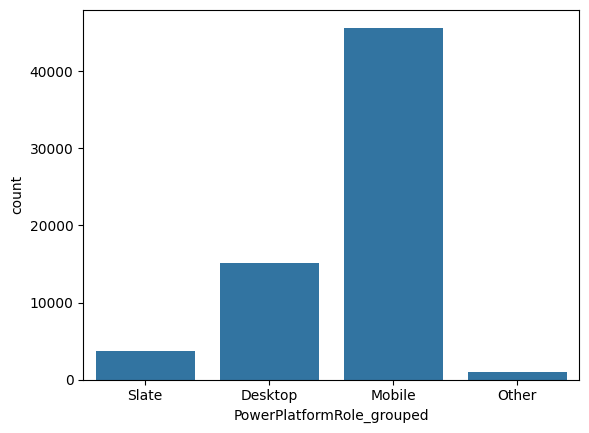

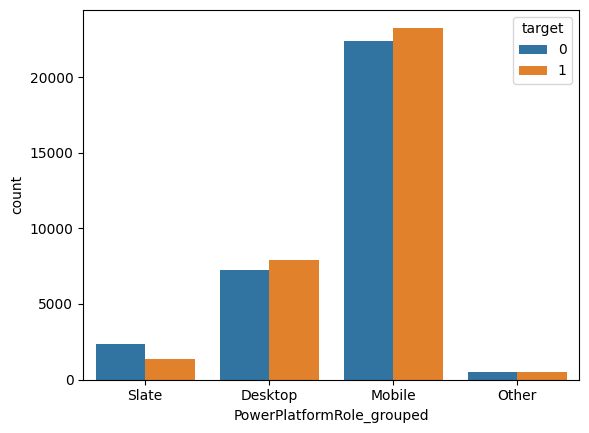

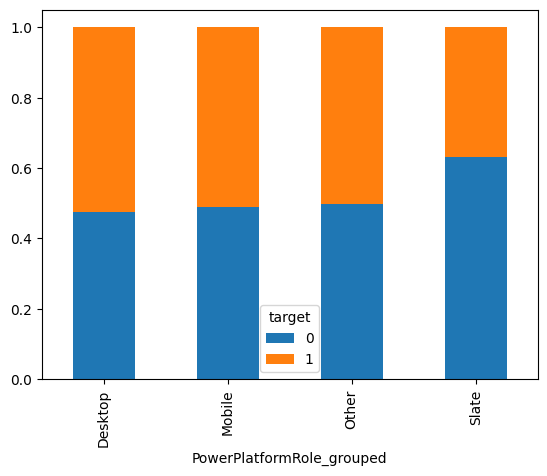

In [34]:
#plot_and_compare (df, affected_df, not_affected_df , 'PrimaryDisplayDiagonalInches') #Not useful
#plot_and_compare (df, affected_df, not_affected_df , 'PrimaryDisplayResolutionVertical')# Not useful

count_classes(df,affected_df, not_affected_df, 'PowerPlatformRole')
count_ploting(df,affected_df,not_affected_df, 'PowerPlatformRole')
group_categories_plot(df,affected_df, not_affected_df,'PowerPlatformRole', 3) # good Predictor

No of InternalBatteryNumberOfCharges:1361
Categories to keep: Index([0.0, 4294967295.0, 1.0, 2.0, 16.0], dtype='float64', name='InternalBatteryNumberOfCharges')
--- Raw Counts ---
target                                      0      1
InternalBatteryNumberOfCharges_grouped              
0.0                                     18837  19158
1.0                                       212    166
16.0                                      101     82
2.0                                       118     77
4294967295.0                             8161   8814
Other                                    5013   4796

--- Proportions (percentages) ---
target                                         0         1
InternalBatteryNumberOfCharges_grouped                    
0.0                                     0.495776  0.504224
1.0                                     0.560847  0.439153
16.0                                    0.551913  0.448087
2.0                                     0.605128  0.394872
4294967

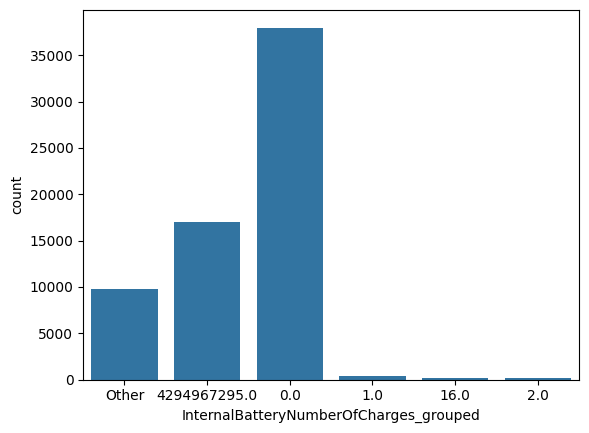

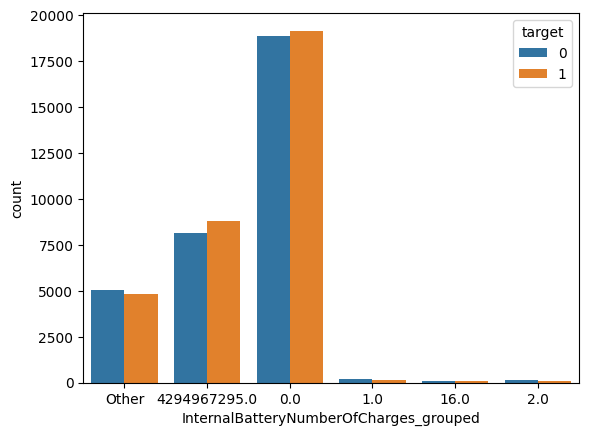

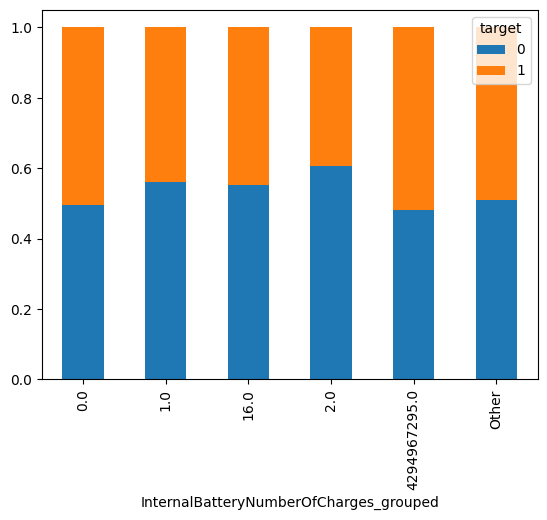

In [35]:
count_classes(df, affected_df, not_affected_df ,'InternalBatteryNumberOfCharges')
group_categories_plot(df, affected_df, not_affected_df, 'InternalBatteryNumberOfCharges',5) #useless

--- Raw Counts ---
target         0      1
OSVersion              
10.0.0.0   31899  32558
10.0.1.0       1      0
10.0.2.0       1      0
10.0.3.0       1      0
10.0.4.0       0      1
6.1.1.0       85     68
6.3.0.0      455    466

--- Proportions (percentages) ---
target            0         1
OSVersion                    
10.0.0.0   0.494888  0.505112
10.0.1.0   1.000000  0.000000
10.0.2.0   1.000000  0.000000
10.0.3.0   1.000000  0.000000
10.0.4.0   0.000000  1.000000
6.1.1.0    0.555556  0.444444
6.3.0.0    0.494028  0.505972

--- Differences  (percentages) ---
OSVersion
10.0.0.0    0.010224
10.0.1.0   -1.000000
10.0.2.0   -1.000000
10.0.3.0   -1.000000
10.0.4.0    1.000000
6.1.1.0    -0.111111
6.3.0.0     0.011944
dtype: float64


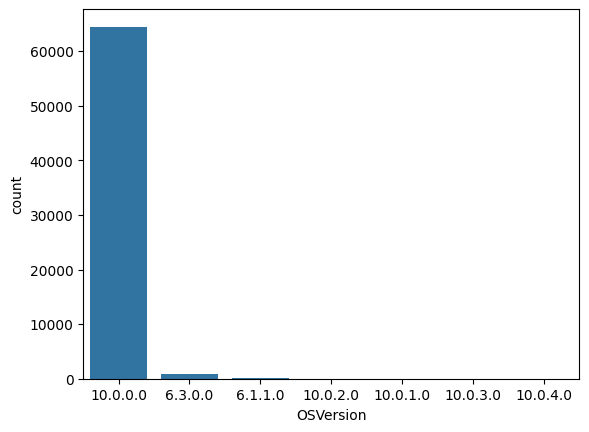

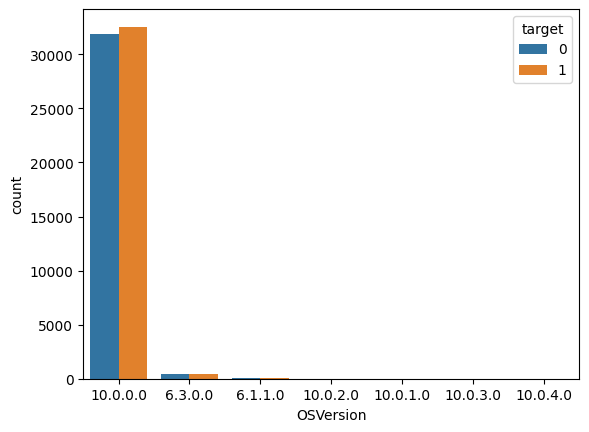

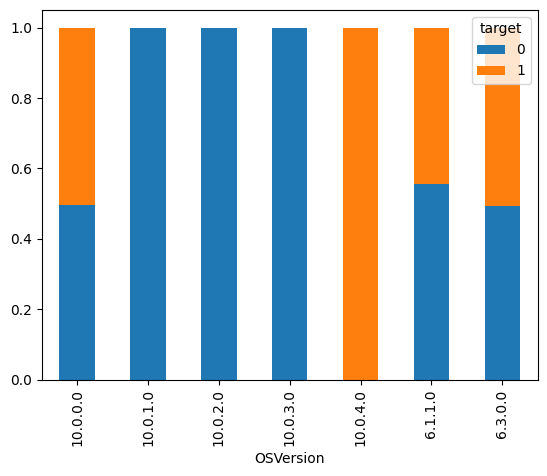

In [36]:
count_ploting(df, affected_df, not_affected_df, 'OSVersion') # useless

--- Raw Counts ---
target               0      1
FirewallEnabled              
0.0                697    604
1.0              31677  32437

--- Proportions (percentages) ---
target                  0         1
FirewallEnabled                    
0.0              0.535742  0.464258
1.0              0.494073  0.505927

--- Differences  (percentages) ---
FirewallEnabled
0.0   -0.071483
1.0    0.011854
dtype: float64


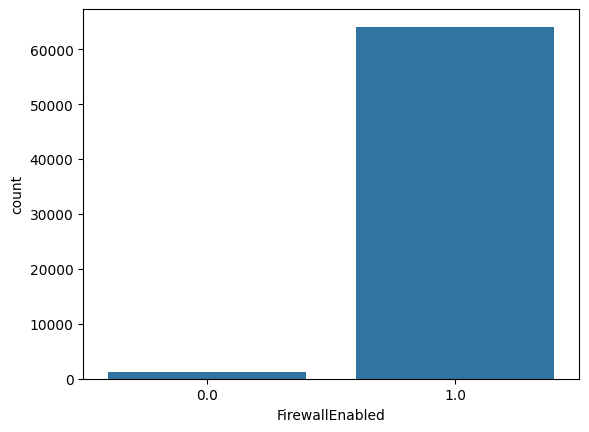

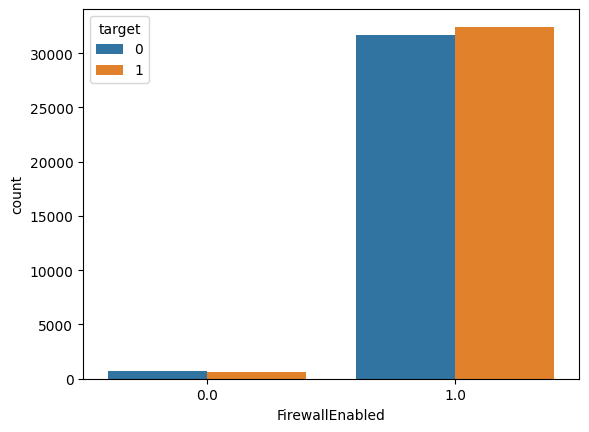

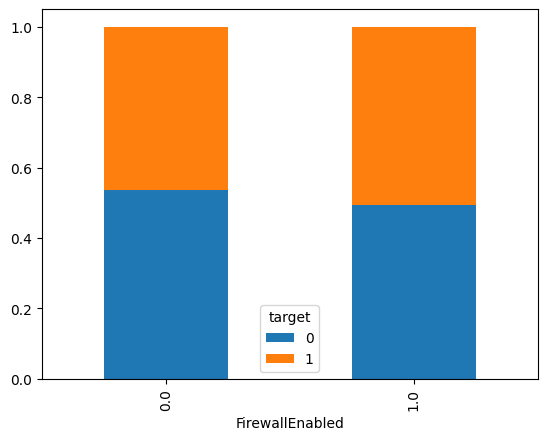

In [37]:
count_ploting(df, affected_df, not_affected_df, 'FirewallEnabled') # weak 

Categories to keep: Index(['UUPUpgrade', 'Update', 'IBSClean', 'Upgrade', 'Other', 'Reset',
       'Refresh', 'Clean'],
      dtype='object', name='OSInstallType')
--- Raw Counts ---
target                    0      1
OSInstallType_grouped             
Clean                   255    275
IBSClean               5263   5661
Other                  3207   2989
Refresh                 780    672
Reset                  2402   2292
UUPUpgrade             9758  11310
Update                 5798   5327
Upgrade                4979   4567

--- Proportions (percentages) ---
target                        0         1
OSInstallType_grouped                    
Clean                  0.481132  0.518868
IBSClean               0.481783  0.518217
Other                  0.517592  0.482408
Refresh                0.537190  0.462810
Reset                  0.511717  0.488283
UUPUpgrade             0.463167  0.536833
Update                 0.521169  0.478831
Upgrade                0.521580  0.478420

--- Differe

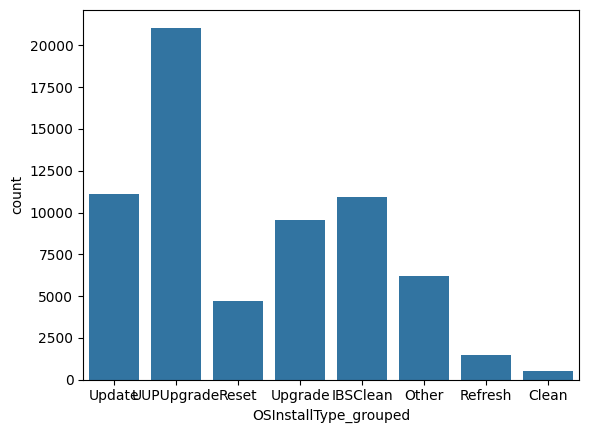

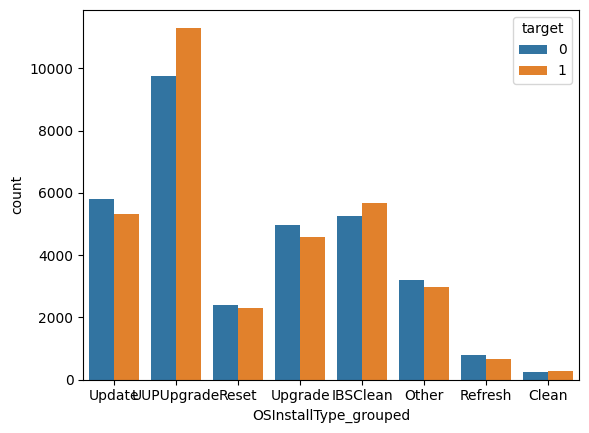

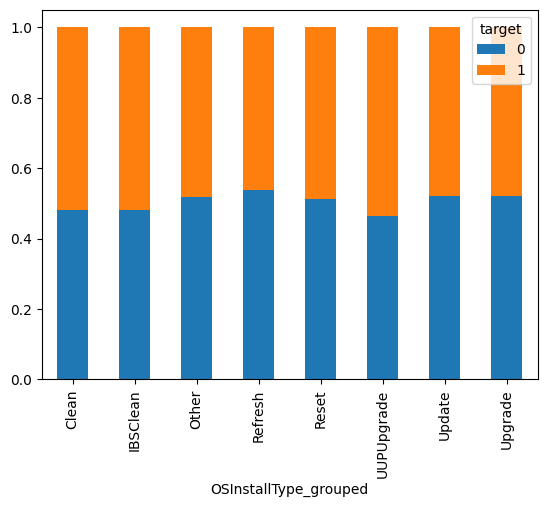

In [38]:
group_categories_plot(df, affected_df, not_affected_df,'OSInstallType', 8) # good predictor strong top 8 

In [39]:
def plot_and_compare_dates (df, affected, not_affected_df , column_name):
    """ Plots 2 things 
        1. histogram to visualise the distribution
        2. box plot to visualise the IQR for different classes. 
    """
    sns.histplot(data=df, x=column_name, kde=True)
    #histogram plot to show distribution
    plt.show()

      # Boxplot to compare the distribution
    sns.boxplot(data=df, x=column_name)
    plt.title('affected plot')
    plt.show()
    l.add(column)


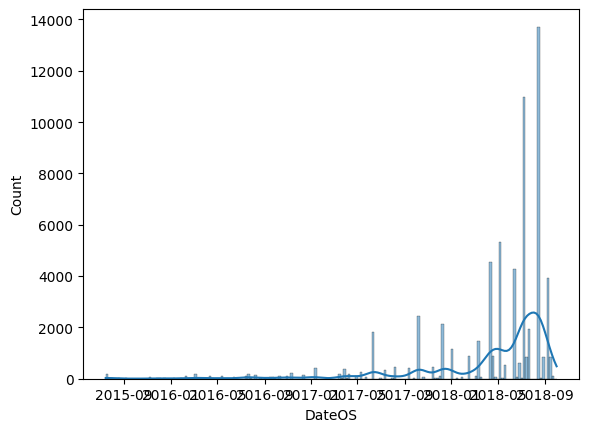

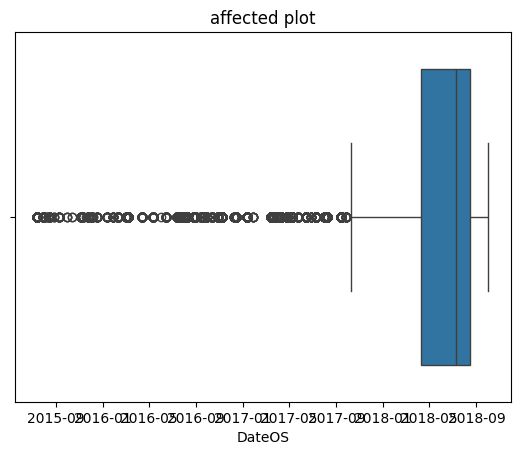

In [40]:
df['DateOS'] = pd.to_datetime(df['DateOS'], errors='coerce')# converts every date stirng to 
affected_df = df[df['target'] == 1]
not_affected_df = df[df['target'] == 0]
plot_and_compare_dates(df, affected_df, not_affected_df , 'DateOS')


In [42]:
len(l)

37